In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
import numpy as np
print(os.getcwd())
from json import load
import pickle

import sys
home_folder = os.environ["HOME"]
workdir = os.path.join(home_folder,"Adaptive_stopping_MC_RL","adastop")
sys.path.insert(0, workdir)

from compare_agents import MultipleAgentsComparator


/home/ashilova/Adaptive_stopping_MC_RL/adastop/example_simulatedR


/home/ashilova/miniconda3/envs/rlberry/lib/python3.8/site-packages/gym/envs/registration.py:423: UserWarning: WARN: Custom namespace `MinAtar` is being overridden by namespace `MinAtar`. If you are developing a plugin you shouldn't specify a namespace in `register` calls. The namespace is specified through the entry point package metadata.
  logger.warn(
/home/ashilova/miniconda3/envs/rlberry/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ashilova/miniconda3/envs/rlberry/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [2]:
# path_res = "./mgres"
path_res = "/home/rdellave/Adaptive_stopping_MC_RL/adastop/example_simulatedR/mgres"

In [3]:
li = os.listdir(path_res)
n_iters = {}
decs = {}
for elem in li:
    elem_path = os.path.join(path_res, elem)
    with open(elem_path,"rb") as f:
        params, comp = pickle.load(f)
    dmu = params["diff_means"]

    if dmu in n_iters.keys():
        n_iters[dmu].append(comp["n_iter"] / 2)
    else:
        n_iters[dmu] = [comp["n_iter"]/2]

    if dmu in decs.keys():
        decs[dmu].append(comp["decision"])
    else:
        decs[dmu] = [comp["decision"]]


Note that in the following we plot 3 stds to cover 99% confidence interval

In [4]:
power = {}
power_std = {}
power_confidence_interval = {}
n_iter_avg = {}
sqrt_n = np.sqrt(len(decs[0]))
print(sqrt_n)

for dmu in decs.keys():
    p = np.array(decs[dmu]) == "reject"
    power[dmu] = np.mean(p)
    power_std[dmu] = np.std(p)
    power_confidence_interval[dmu] = np.std(p)/sqrt_n*3
for k in n_iters.keys():
    n_iter_avg[k] = np.mean(n_iters[k])

powers, power_stds, power_confidence_intervals = dict(sorted(power.items())),  dict(sorted(power_std.items())), dict(sorted(power_confidence_interval.items())) 

100.0


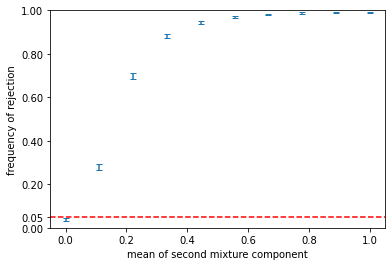

In [5]:
import sys
import os
home_folder = os.environ["HOME"]
workdir = os.path.join(home_folder,"Adaptive_stopping_MC_RL","adastop", "example_simulatedR")
sys.path.insert(0, workdir)

plt.axhline(y = 0.05, color = 'r', linestyle = '--')
# plt.axhline(y = 1, color = 'r', linestyle = '-')
# plt.axhline(y = 0., color = 'r', linestyle = '-')
plt.ylim((0,1))
plt.yticks(np.append(np.linspace(0,1,6),0.05))
# plt.errorbar(powers.keys(), powers.values(), list(power_stds.values()), linestyle='None', marker= 'o', capsize=3)
plt.errorbar(powers.keys(), powers.values(), list(power_confidence_intervals.values()), linestyle='None', fmt = "none", capsize=3)
plt.ylabel("frequency of rejection")
plt.xlabel("mean of second mixture component")

plt.savefig(os.path.join(workdir, "gaussianVSmg.png"))
plt.savefig(os.path.join(workdir, "gaussianVSmg.pdf"))




## Means tests

In [6]:
# path_res = "./mgres"
path_res2 = "/home/ashilova/Adaptive_stopping_MC_RL/adastop/example_simulatedR/mgres/exp1"

In [7]:
li = os.listdir(path_res2)
n_iters2 = {}
decs2 = {}
for elem in li:
    elem_path = os.path.join(path_res2, elem)
    with open(elem_path,"rb") as f:
        params, comp = pickle.load(f)
    dmu = params["dist_params"]

    if dmu in n_iters2.keys():
        n_iters2[dmu].append(list(comp.n_iters.values())[0] / 2)
    else:
        n_iters2[dmu] = [list(comp.n_iters.values())[0] / 2]

    if dmu in decs2.keys():
        decs2[dmu].append(list(comp.decisions.values())[0])
    else:
        decs2[dmu] = [list(comp.decisions.values())[0]]


In [8]:
len(decs2[0.7777777777777777])

5000

Note that in the following we plot 3 stds to cover 99% confidence interval

In [9]:
power2 = {}
power_std2 = {}
power_confidence_interval2 = {}
n_iter_avg2 = {}
sqrt_n = np.sqrt(len(decs2[0]))
print(sqrt_n)

for dmu in decs2.keys():
    p = np.array(decs2[dmu]) != "equal"
    power2[dmu] = np.mean(p)
    power_std2[dmu] = np.std(p)
    power_confidence_interval2[dmu] = np.std(p)/sqrt_n*3
for k in n_iters2.keys():
    n_iter_avg2[k] = np.mean(n_iters2[k])

powers2, power_stds2, power_confidence_intervals2 = dict(sorted(power2.items())),  dict(sorted(power_std2.items())), dict(sorted(power_confidence_interval2.items())) 

70.71067811865476


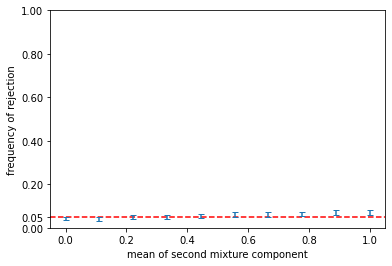

In [10]:
import sys
import os
home_folder = os.environ["HOME"]
workdir = os.path.join(home_folder,"Adaptive_stopping_MC_RL","adastop", "example_simulatedR")
sys.path.insert(0, workdir)

plt.axhline(y = 0.05, color = 'r', linestyle = '--')
# plt.axhline(y = 1, color = 'r', linestyle = '-')
# plt.axhline(y = 0., color = 'r', linestyle = '-')
plt.ylim((0,1))
plt.yticks(np.append(np.linspace(0,1,6),0.05))
# plt.errorbar(powers.keys(), powers.values(), list(power_stds.values()), linestyle='None', marker= 'o', capsize=3)
plt.errorbar(powers2.keys(), powers2.values(), list(power_confidence_intervals2.values()), linestyle='None', fmt = "none", capsize=3)
plt.ylabel("frequency of rejection")
plt.xlabel("mean of second mixture component")

plt.savefig(os.path.join(workdir, "gaussianVSmg_samemean.png"))
plt.savefig(os.path.join(workdir, "gaussianVSmg_samemean.pdf"))




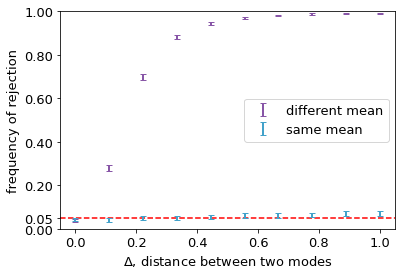

In [23]:
import sys
import os
import seaborn

# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "Helvetica"
# })

plt.rcParams.update({'font.size': 13})

home_folder = os.environ["HOME"]
workdir = os.path.join(home_folder,"Adaptive_stopping_MC_RL","adastop", "example_simulatedR")
sys.path.insert(0, workdir)

plt.axhline(y = 0.05, color = 'r', linestyle = '--')
# plt.axhline(y = 1, color = 'r', linestyle = '-')
# plt.axhline(y = 0., color = 'r', linestyle = '-')
plt.ylim((0,1))
plt.yticks(np.append(np.linspace(0,1,6),0.05))
plt.errorbar(powers.keys(), powers.values(), list(power_confidence_intervals.values()), linestyle='None', fmt = "none", capsize=3, label = "different mean", color = "#8856a7", linewidth=2)
# plt.errorbar(powers.keys(), powers.values(), list(power_stds.values()), linestyle='None', marker= 'o', capsize=3)
plt.errorbar(powers2.keys(), powers2.values(), list(power_confidence_intervals2.values()), linestyle='None', fmt = "none", capsize=3, label = "same mean", color = '#43a2ca', linewidth = 2)
plt.ylabel("frequency of rejection")
plt.xlabel("$\Delta$, distance between two modes")
plt.legend(loc = "right")

plt.savefig(os.path.join(workdir, "gaussianVSmg_exp1-2.png"))
plt.savefig(os.path.join(workdir, "gaussianVSmg_exp1-2.pdf"))

## Analysing FWE

In [3]:
# path_res = "./mgres"
path_res3 = "/home/ashilova/Adaptive_stopping_MC_RL/adastop/example_simulatedR/multc_sd_res/exp4"

In [11]:
true_hyp = [[0,1], [2,3], [6,7]]
true_hyp_means = [[0,1], [0,2], [0,3], [0,4], [1,2], [1,3], [1,4], [2,3], [2,4], [3,4], [0,5], [1,5], [2,5], [3,5], [4,5], [6,7], [6,8], [7,8]]

In [ ]:
li = os.listdir(path_res3)
n_iters3 = {}
decs3 = {}


elem_path = os.path.join(path_res3, li[0])
with open(elem_path,"rb") as f:
    params, comp = pickle.load(f)


In [9]:
comp.agent_names

['N', '*N', '*MG1', 'MG1', 'MG2', 'tS1', 'MG3', '*MG3', 'MtS', 'tS2']

In [25]:
li = os.listdir(path_res3)
n_tests = len(li)
n_iters3 = {}
nrej3 = 0
nrej3_means= 0
for elem in li:
    elem_path = os.path.join(path_res3, elem)
    with open(elem_path,"rb") as f:
        params, comp = pickle.load(f)
    # dmu = params["dist_params"]

    # if dmu in n_iters3.keys():
    #     n_iters3[dmu].append(list(comp.n_iters3.values())[0] / 2)
    # else:
    #     n_iters3[dmu] = [list(comp.n_iters3.values())[0] / 2]

    for h in true_hyp:
        key = "[{} {}]".format(h[0], h[1])
        if comp.decisions[key] != "equal":
            nrej3 += 1
            break


    for h in true_hyp_means:
        key = "[{} {}]".format(h[0], h[1])
        if comp.decisions[key] != "equal":
            nrej3_means += 1
            break
        



In [29]:
nrej3_means

236

In [30]:
FWE = nrej3/n_tests

FWE_means = nrej3_means/ n_tests

FWE, FWE_means

(0.0178, 0.0472)

Note that in the following we plot 3 stds to cover 99% confidence interval

In [ ]:
power = {}
power_std = {}
power_confidence_interval = {}
n_iter_avg = {}
sqrt_n = np.sqrt(len(decs[0]))
print(sqrt_n)

for dmu in decs.keys():
    p = np.array(decs[dmu]) == "reject"
    power[dmu] = np.mean(p)
    power_std[dmu] = np.std(p)
    power_confidence_interval[dmu] = np.std(p)/sqrt_n*3
for k in n_iters.keys():
    n_iter_avg[k] = np.mean(n_iters[k])

powers, power_stds, power_confidence_intervals = dict(sorted(power.items())),  dict(sorted(power_std.items())), dict(sorted(power_confidence_interval.items())) 

100.0


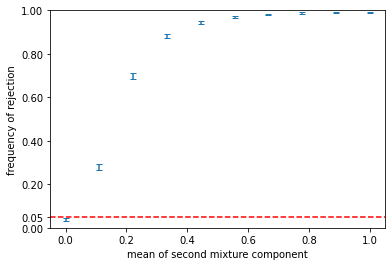

In [ ]:
import sys
import os
home_folder = os.environ["HOME"]
workdir = os.path.join(home_folder,"Adaptive_stopping_MC_RL","adastop", "example_simulatedR")
sys.path.insert(0, workdir)

plt.axhline(y = 0.05, color = 'r', linestyle = '--')
# plt.axhline(y = 1, color = 'r', linestyle = '-')
# plt.axhline(y = 0., color = 'r', linestyle = '-')
plt.ylim((0,1))
plt.yticks(np.append(np.linspace(0,1,6),0.05))
# plt.errorbar(powers.keys(), powers.values(), list(power_stds.values()), linestyle='None', marker= 'o', capsize=3)
plt.errorbar(powers.keys(), powers.values(), list(power_confidence_intervals.values()), linestyle='None', fmt = "none", capsize=3)
plt.ylabel("frequency of rejection")
plt.xlabel("mean of second mixture component")

plt.savefig(os.path.join(workdir, "gaussianVSmg.png"))
plt.savefig(os.path.join(workdir, "gaussianVSmg.pdf"))


